In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.stats import entropy
from sklearn.decomposition import PCA
from scipy.optimize import curve_fit



In [ ]:
dataset_path = '/content/2003.csv'

In [ ]:
dataset = pd.read_csv('/content/2003.csv')


In [ ]:
print(dataset.dtypes)


-0.022\t-0.039\t-0.183\t-0.054\t-0.105\t-0.134\t-0.129\t-0.142    object
dtype: object


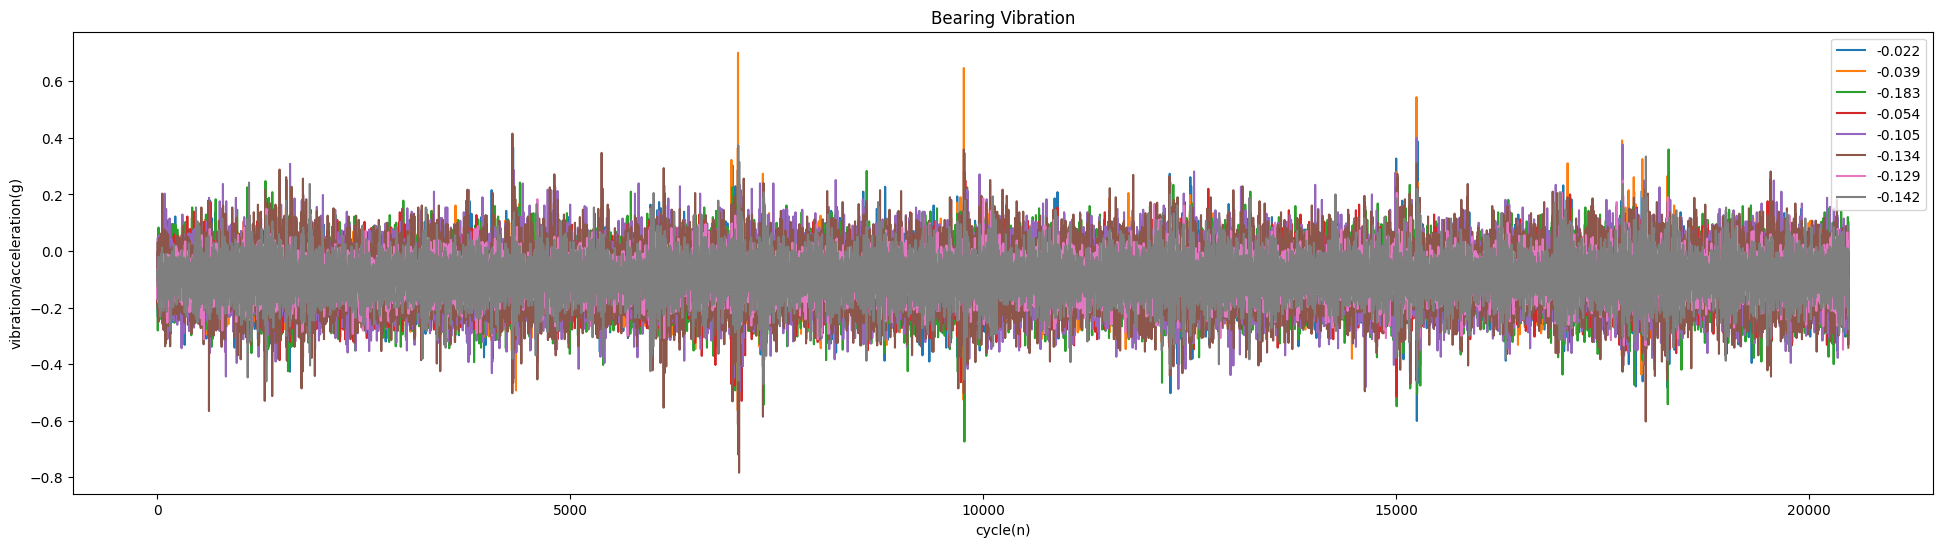

In [ ]:
# Test for the first file
dataset = pd.read_csv('/content/2003.csv', sep='\t')
ax = dataset.plot(figsize = (24,6), title= "Bearing Vibration" , legend = True)
ax.set(xlabel="cycle(n)", ylabel="vibration/acceleration(g)")
plt.show()

In [ ]:
def calculate_rms(df):
    result = []
    for col in df:
        r = np.sqrt((df[col]**2).sum() / len(df[col]))
        result.append(r)
    return result

# extract peak-to-peak features
def calculate_p2p(df):
    return np.array(df.max().abs() + df.min().abs())

# extract shannon entropy (cut signals to 500 bins)
def calculate_entropy(df):
    ent = []
    for col in df:
        ent.append(entropy(pd.cut(df[col], 500).value_counts()))
    return np.array(ent)
# extract clearence factor
def calculate_clearence(df):
    result = []
    for col in df:
        r = ((np.sqrt(df[col].abs())).sum() / len(df[col]))**2
        result.append(r)
    return result
def time_features(dataset_path, id_set=None):
    time_features = ['mean','std','skew','kurtosis','entropy','rms','max','p2p', 'crest', 'clearence', 'shape', 'impulse']
    cols1 = ['B1_x','B1_y','B2_x','B2_y','B3_x','B3_y','B4_x','B4_y']
    cols2 = ['B1','B2','B3','B4']
     # initialize
    if id_set == 1:
        columns = [c+'_'+tf for c in cols1 for tf in time_features]
        data = pd.DataFrame(columns=columns)
    else:
        columns = [c+'_'+tf for c in cols2 for tf in time_features]
        data = pd.DataFrame(columns=columns)


In [ ]:

# Read the CSV file
raw_data = pd.read_csv(dataset_path, sep='\t')

# Perform calculations on the dataset
mean_abs = np.array(raw_data.abs().mean())
std = np.array(raw_data.std())
skew = np.array(raw_data.skew())
kurtosis = np.array(raw_data.kurtosis())

# Specify the column names for DataFrames
cols1 = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8']

# Create the DataFrames
mean_abs_df = pd.DataFrame(mean_abs.reshape(1, 8), columns=[c + '_mean' for c in cols1])
std_df = pd.DataFrame(std.reshape(1, 8), columns=[c + '_std' for c in cols1])
skew_df = pd.DataFrame(skew.reshape(1, 8), columns=[c + '_skew' for c in cols1])
kurtosis_df = pd.DataFrame(kurtosis.reshape(1, 8), columns=[c + '_kurtosis' for c in cols1])


In [ ]:
def process_data(dataset_path, id_set):
   # Perform calculations on the dataset
    mean_abs = np.array(raw_data.abs().mean())
    std = np.array(raw_data.std())
    skew = np.array(raw_data.skew())
    kurtosis = np.array(raw_data.kurtosis())
    entropy = calculate_entropy(raw_data)
    rms = np.array(calculate_rms(raw_data))
    max_abs = np.array(raw_data.abs().max())
    p2p = calculate_p2p(raw_data)
    crest = max_abs / rms
    clearence = np.array(calculate_clearence(raw_data))
    shape = rms / mean_abs
    impulse = max_abs / mean_abs

    # Specify the column names for DataFrames
    cols1 = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8']
    cols2 = ['col9', 'col10', 'col11', 'col12']
    time_features = ['mean', 'std', 'skew', 'kurtosis', 'entropy', 'rms', 'max', 'p2p', 'crest', 'clearence', 'shape', 'impulse']

    # Create the DataFrames
    if id_set == 1:
        data_dict = {}
        data_dict['mean_abs'] = pd.DataFrame(mean_abs.reshape(1, 8), columns=[c + '_mean' for c in cols1])
        data_dict['std'] = pd.DataFrame(std.reshape(1, 8), columns=[c + '_std' for c in cols1])
        data_dict['skew'] = pd.DataFrame(skew.reshape(1, 8), columns=[c + '_skew' for c in cols1])
        data_dict['kurtosis'] = pd.DataFrame(kurtosis.reshape(1, 8), columns=[c + '_kurtosis' for c in cols1])
        data_dict['entropy'] = pd.DataFrame(entropy.reshape(1, 8), columns=[c + '_entropy' for c in cols1])
        data_dict['rms'] = pd.DataFrame(rms.reshape(1, 8), columns=[c + '_rms' for c in cols1])
        data_dict['max_abs'] = pd.DataFrame(max_abs.reshape(1, 8), columns=[c + '_max' for c in cols1])
        data_dict['p2p'] = pd.DataFrame(p2p.reshape(1, 8), columns=[c + '_p2p' for c in cols1])
        data_dict['crest'] = pd.DataFrame(crest.reshape(1, 8), columns=[c + '_crest' for c in cols1])
        data_dict['clearence'] = pd.DataFrame(clearence.reshape(1, 8), columns=[c + '_clearence' for c in cols1])
        data_dict['shape'] = pd.DataFrame(shape.reshape(1, 8), columns=[c + '_shape' for c in cols1])
        data_dict['impulse'] = pd.DataFrame(impulse.reshape(1, 8), columns=[c + '_impulse' for c in cols1])
    else:
        data_dict = {}
        data_dict['mean_abs'] = pd.DataFrame(mean_abs.reshape(1, 4), columns=[c + '_mean' for c in cols2])
        data_dict['std'] = pd.DataFrame(std.reshape(1, 4), columns=[c + '_std' for c in cols2])
        data_dict['skew'] = pd.DataFrame(skew.reshape(1, 4), columns=[c + '_skew' for c in cols2])
        data_dict['kurtosis'] = pd.DataFrame(kurtosis.reshape(1, 4), columns=[c + '_kurtosis' for c in cols2])
        data_dict['entropy'] = pd.DataFrame(entropy.reshape(1, 4), columns=[c + '_entropy' for c in cols2])
        data_dict['rms'] = pd.DataFrame(rms.reshape(1, 4), columns=[c + '_rms' for c in cols2])
        data_dict['max_abs'] = pd.DataFrame(max_abs.reshape(1, 4), columns=[c + '_max' for c in cols2])
        data_dict['p2p'] = pd.DataFrame(p2p.reshape(1, 4), columns=[c + '_p2p' for c in cols2])
        data_dict['crest'] = pd.DataFrame(crest.reshape(1, 4), columns=[c + '_crest' for c in cols2])
        data_dict['clearence'] = pd.DataFrame(clearence.reshape(1, 4), columns=[c + '_clearence' for c in cols2])
        data_dict['shape'] = pd.DataFrame(shape.reshape(1, 4), columns=[c + '_shape' for c in cols2])
        data_dict['impulse'] = pd.DataFrame(impulse.reshape(1, 4), columns=[c + '_impulse' for c in cols2])
        data_dict['mean_abs'].index = [filename]

    # Concatenate the DataFrames
    merge = pd.concat(data_dict.values(), axis=1)
    data = data.append(merge)

    # Select columns based on id_set
    if id_set == 1:
        cols = [c + '_' + tf for c in cols1 for tf in time_features]
    else:
        cols = [c + '_' + tf for c in cols2 for tf in time_features]
    data = data[cols]

    # Convert the index to datetime
    data.index = pd.to_datetime(data.index, format='%Y.%m.%d.%H.%M.%S')
    data = data.sort_index()

    return data




In [ ]:
# Assuming your dataset is stored in a 2D list or array called 'data'
data = [
    ['-0.022', '-0.039', '-0.183', '-0.054', '-0.105', '-0.134', '-0.129', '-0.142'],
    ['-0.105', '-0.017', '-0.164', '-0.183', '-0.049', '0.029', '-0.115', '-0.122'],
]

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Set the first row as the index
df = df.set_index(0)

# Rename the index column to 'time'
df.index.name = 'time'

# Display the DataFrame
print(df)



             1       2       3       4       5       6       7
time                                                          
-0.022  -0.039  -0.183  -0.054  -0.105  -0.134  -0.129  -0.142
-0.105  -0.017  -0.164  -0.183  -0.049   0.029  -0.115  -0.122


In [ ]:
print(df.columns)


Int64Index([1, 2, 3, 4, 5, 6, 7], dtype='int64')


In [ ]:
print(df.head())


             1       2       3       4       5       6       7
time                                                          
-0.022  -0.039  -0.183  -0.054  -0.105  -0.134  -0.129  -0.142
-0.105  -0.017  -0.164  -0.183  -0.049   0.029  -0.115  -0.122


In [ ]:
# Extract time features from the index
dataset.index = pd.to_datetime(dataset.index)
dataset['year'] = dataset.index.year
dataset['month'] = dataset.index.month
dataset['day'] = dataset.index.day
dataset['hour'] = dataset.index.hour
dataset['minute'] = dataset.index.minute
dataset['second'] = dataset.index.second
dataset['weekday'] = dataset.index.weekday

# Calculate additional time features
dataset['is_weekend'] = dataset['weekday'].isin([5, 6])  # 5 and 6 represent Saturday and Sunday
dataset['is_business_hours'] = (dataset['hour'] >= 9) & (dataset['hour'] <= 17)

# Save the dataset with time features to a new file
dataset.to_csv('dataset_with_time_features.csv', index=False)

In [ ]:
# Convert the index to datetime format
dataset.index = pd.to_datetime(dataset.index)

# Extract time features
dataset['year'] = dataset.index.year
dataset['month'] = dataset.index.month
dataset['day'] = dataset.index.day
dataset['hour'] = dataset.index.hour
dataset['minute'] = dataset.index.minute
dataset['second'] = dataset.index.second
dataset['weekday'] = dataset.index.weekday

# Calculate additional time features
dataset['is_weekend'] = dataset['weekday'].isin([5, 6])  # 5 and 6 represent Saturday and Sunday
dataset['is_business_hours'] = (dataset['hour'] >= 9) & (dataset['hour'] <= 17)

# Save the dataset with time features to a new file
dataset.to_csv('dataset_with_time_features.csv', index=False)


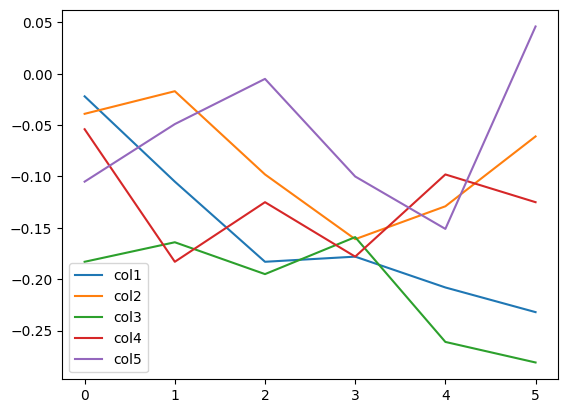

In [ ]:
data = {
    'col1': [-0.022, -0.105, -0.183, -0.178, -0.208, -0.232],
    'col2': [-0.039, -0.017, -0.098, -0.161, -0.129, -0.061],
    'col3': [-0.183, -0.164, -0.195, -0.159, -0.261, -0.281],
    'col4': [-0.054, -0.183, -0.125, -0.178, -0.098, -0.125],
    'col5': [-0.105, -0.049, -0.005, -0.100, -0.151, 0.046],
}

df = pd.DataFrame(data)

# Plot the data
df.plot()

# Show the plot
plt.show()


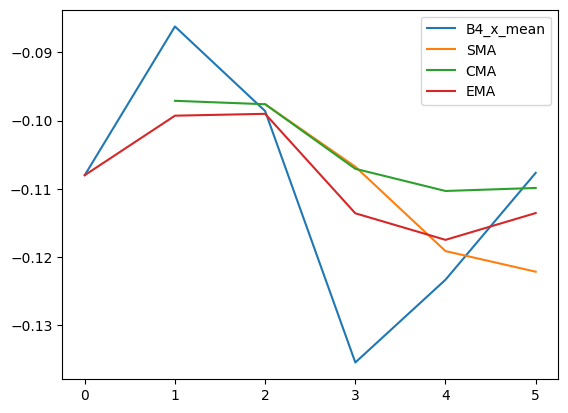

In [ ]:
data = {
    'col1': [-0.022, -0.105, -0.183, -0.178, -0.208, -0.232],
    'col2': [-0.039, -0.017, -0.098, -0.161, -0.129, -0.061],
    'col3': [-0.183, -0.164, -0.195, -0.159, -0.261, -0.281],
    'col4': [-0.054, -0.183, -0.125, -0.178, -0.098, -0.125],
    'col5': [-0.105, -0.049, -0.005, -0.100, -0.151, 0.046],
    'col6': [-0.134, 0.029, -0.007, -0.115, -0.205, -0.088],
    'col7': [-0.129, -0.115, -0.171, -0.112, -0.063, -0.078],
    'col8': [-0.142, -0.122, -0.071, -0.078, -0.066, -0.078],
    'col9': [-0.159, -0.032, -0.161, -0.181, -0.110, -0.044],
    'col10': [-0.225, -0.044, -0.090, -0.159, -0.100, -0.151],
    'col11': [-0.139, -0.076, -0.093, -0.117, -0.039, -0.161],
    'col12': [-0.132, -0.161, -0.090, -0.098, -0.002, -0.161],
    'col13': [-0.042, -0.054, -0.095, -0.232, -0.137, -0.042],
    'col14': [-0.100, -0.151, -0.139, -0.076, -0.093, -0.078],
    'col15': [-0.015, -0.049, 0.044, -0.088, -0.188, -0.081],
}

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Calculate moving averages
ma = pd.DataFrame()
ma['B4_x_mean'] = df.mean(axis=1)  # Calculate the mean across columns
ma['SMA'] = ma['B4_x_mean'].rolling(window=3).mean()
ma['CMA'] = ma['B4_x_mean'].expanding(min_periods=2).mean()
ma['EMA'] = ma['B4_x_mean'].ewm(span=4, adjust=False).mean()

# Plot the data
ma.plot()

# Show the plot
plt.show()



<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


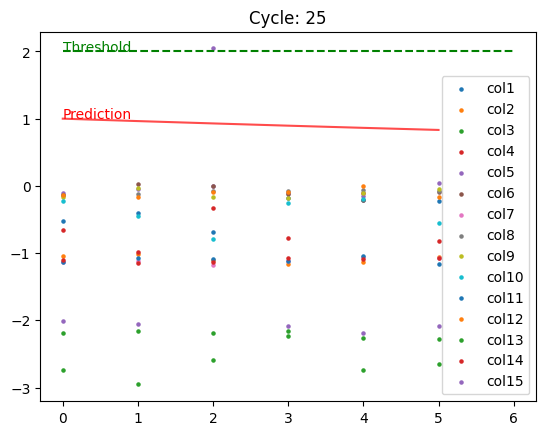

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


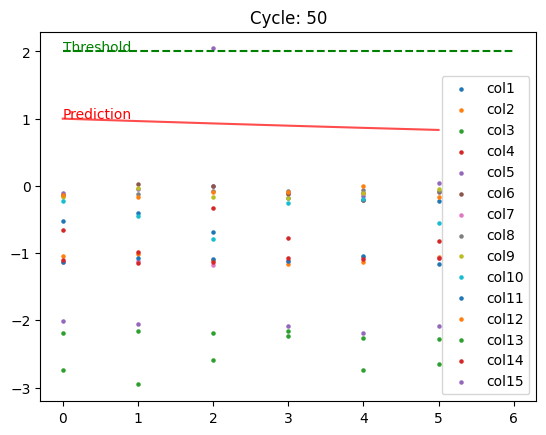

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


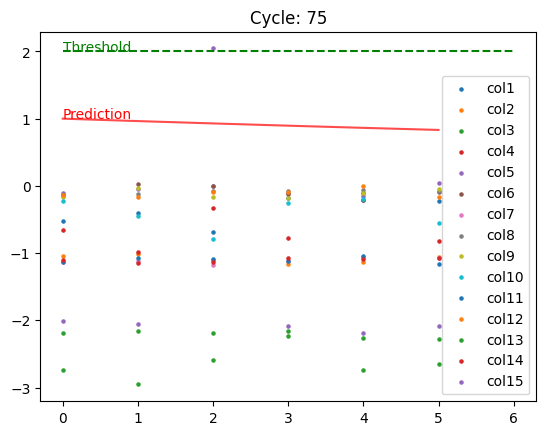

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


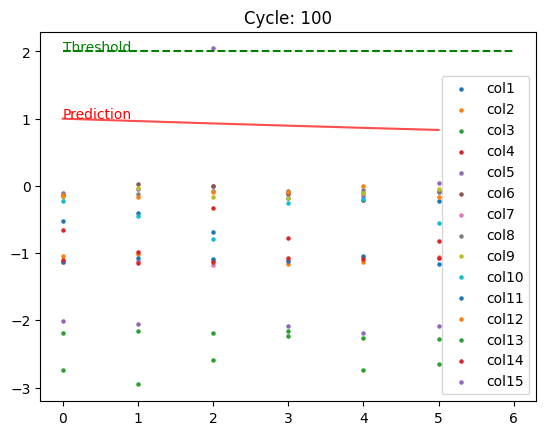

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


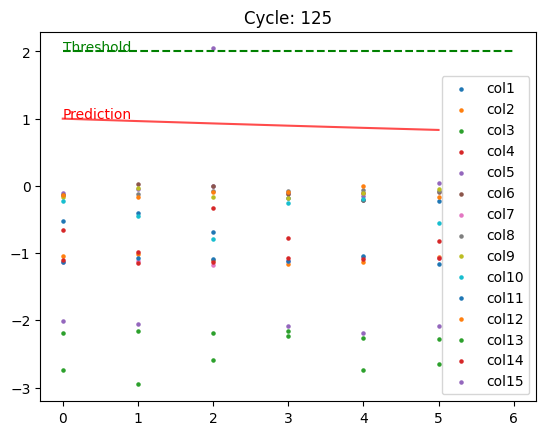

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


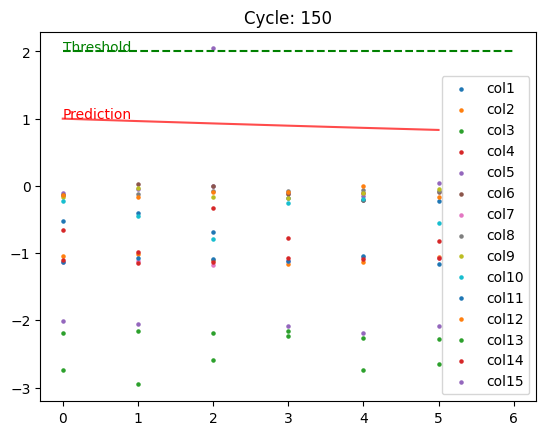

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


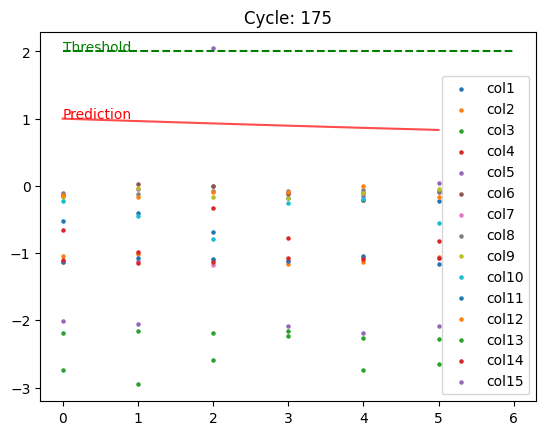

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


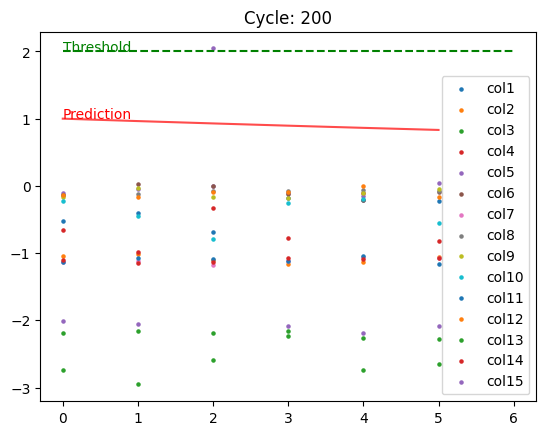

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


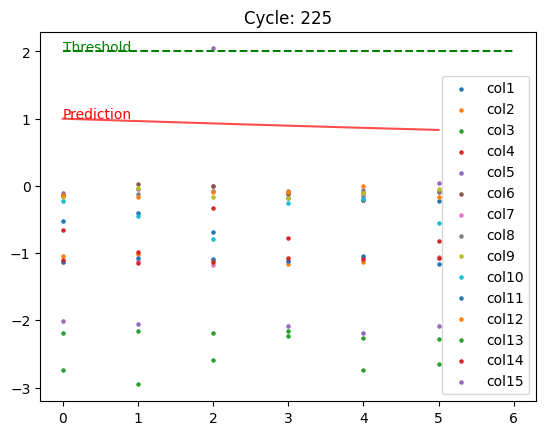

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


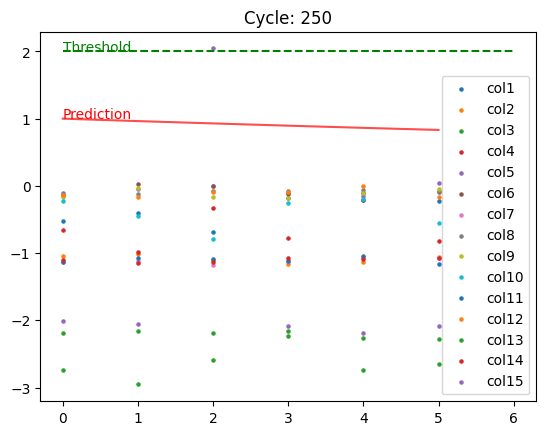

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


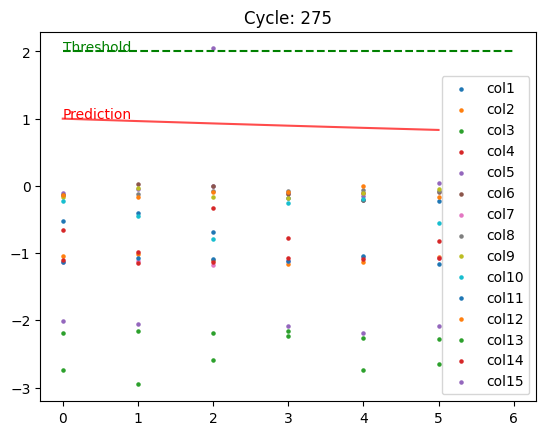

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


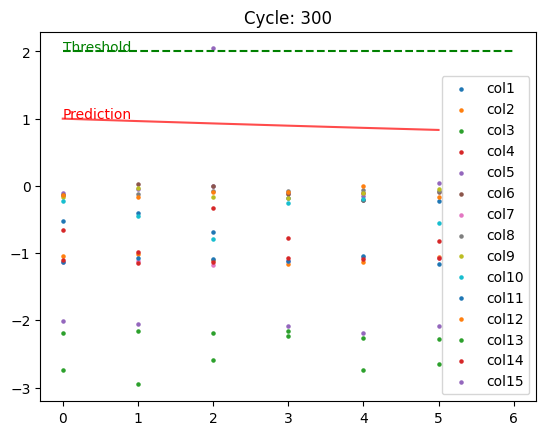

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


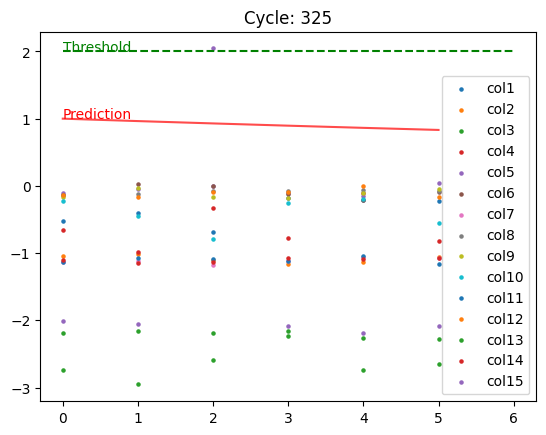

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


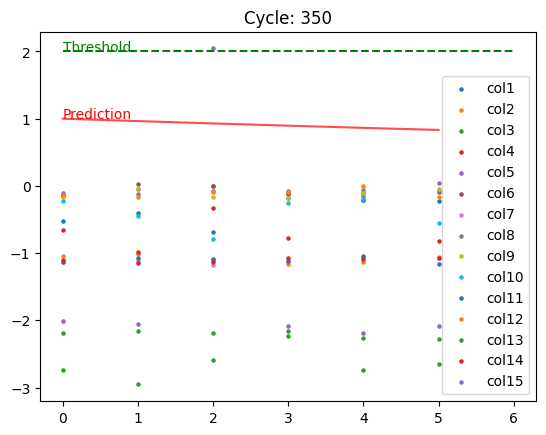

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


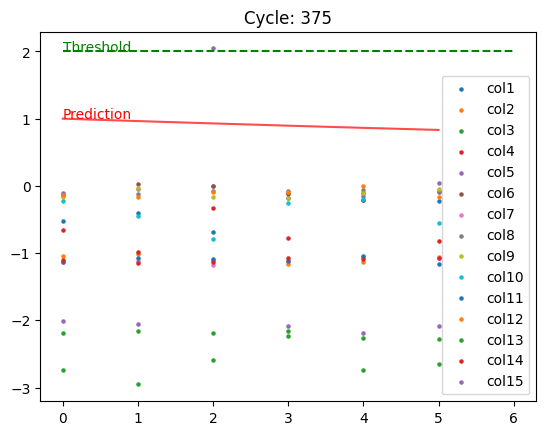

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


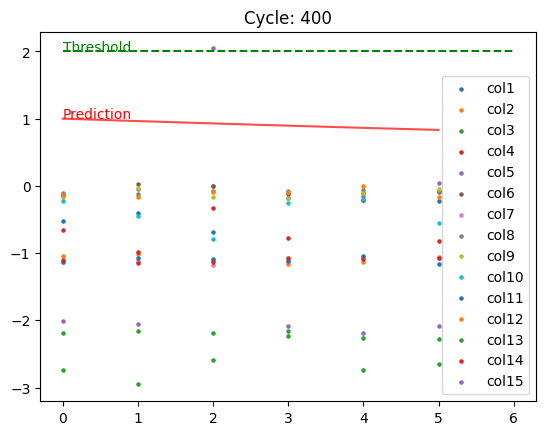

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


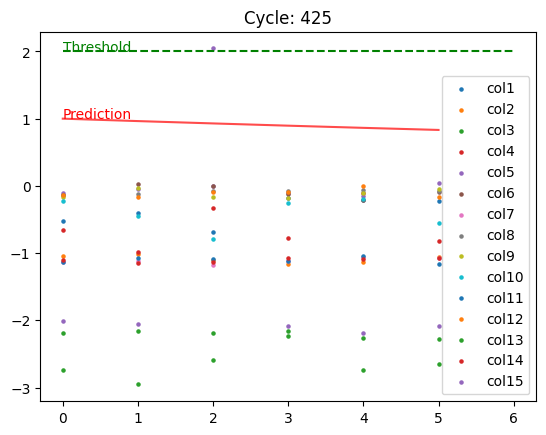

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


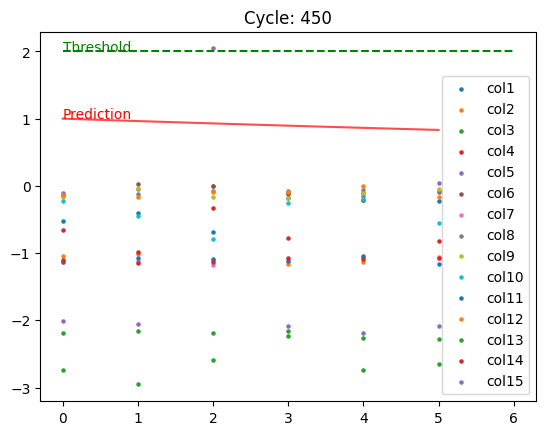

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


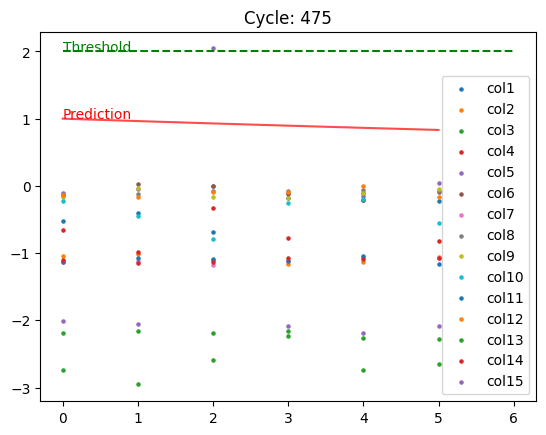

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


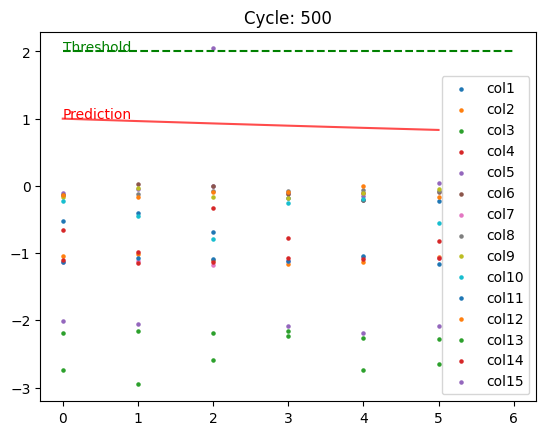

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


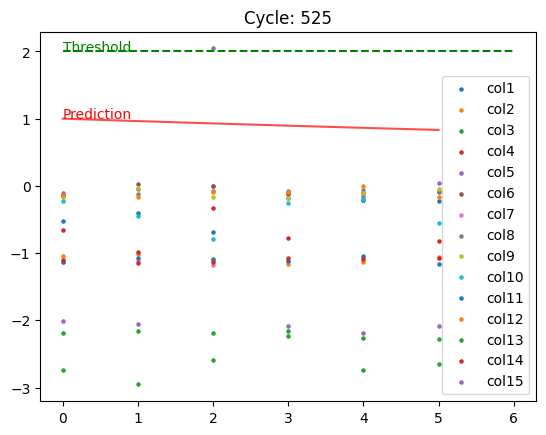

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


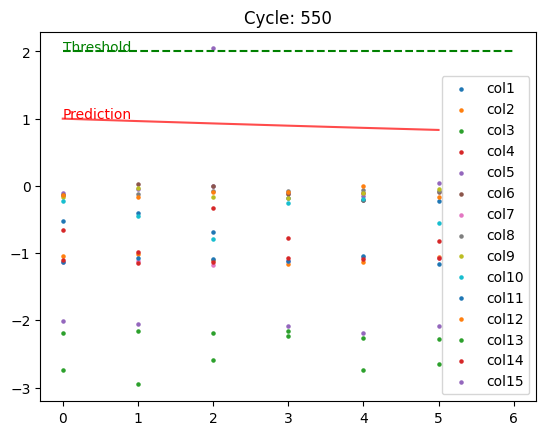

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


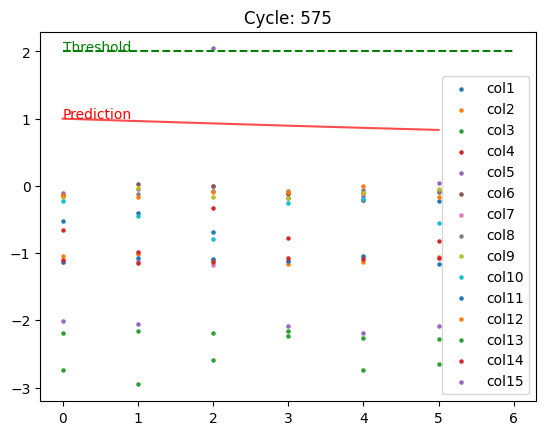

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


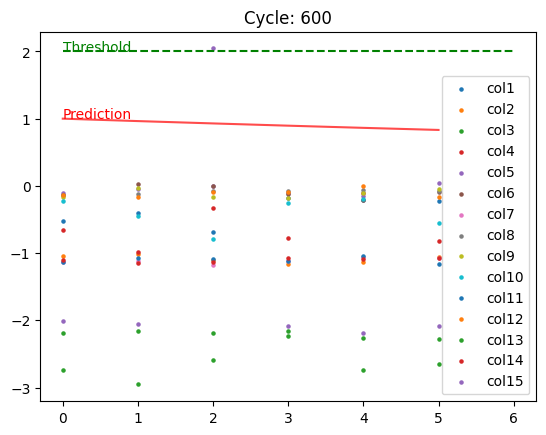

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


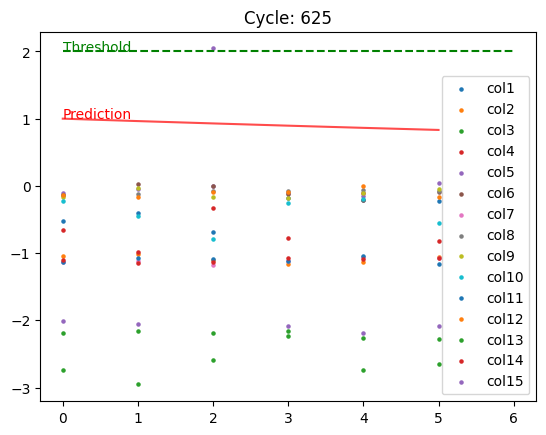

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


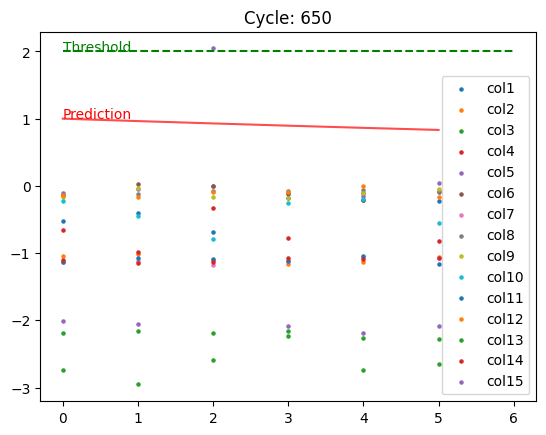

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


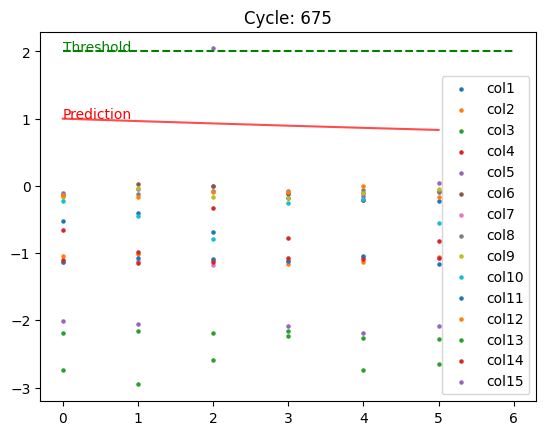

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


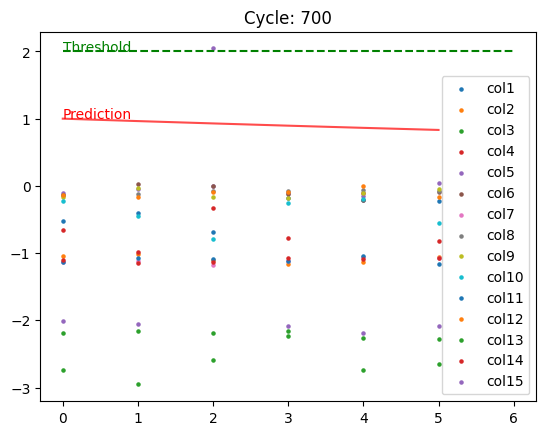

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


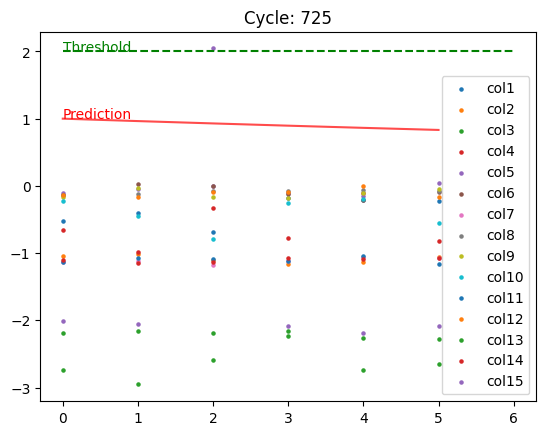

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


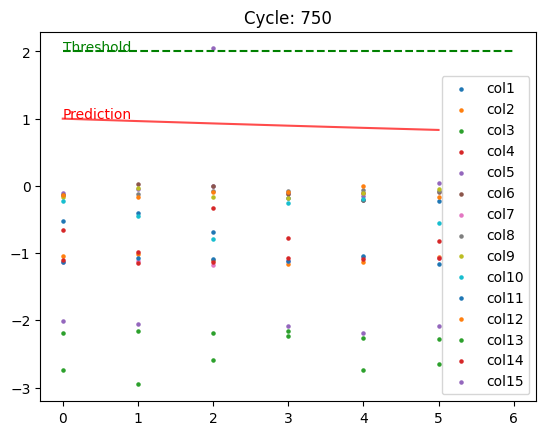

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


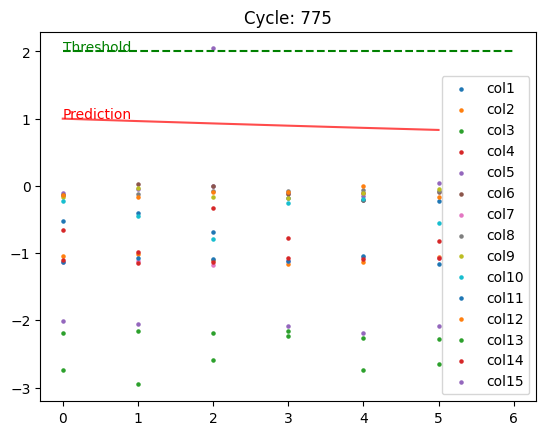

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


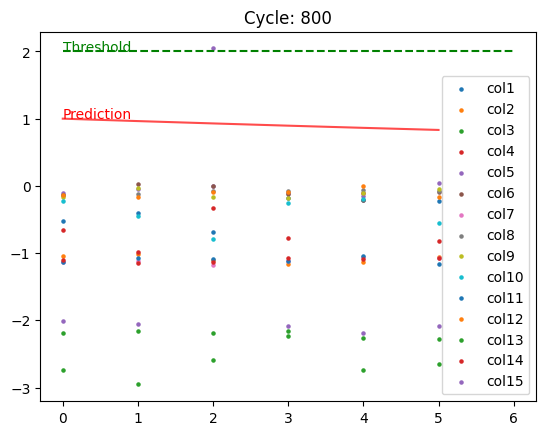

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


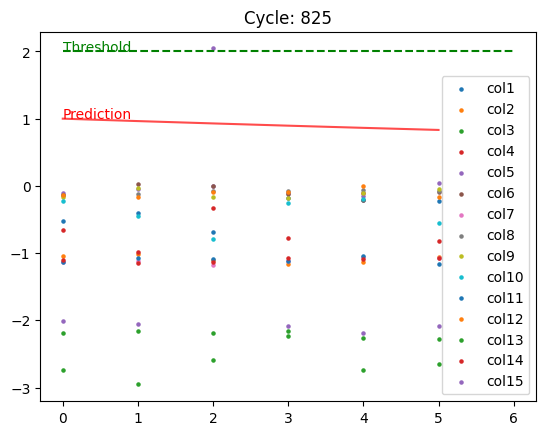

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


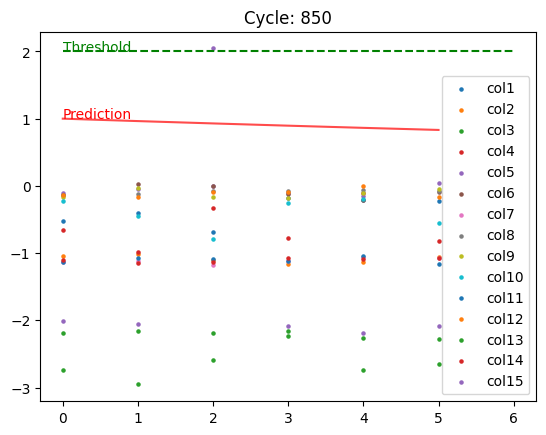

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


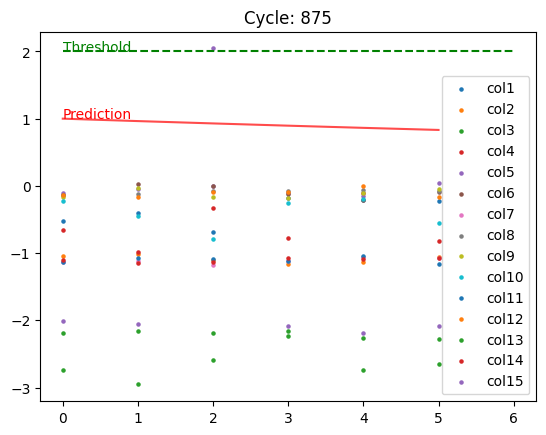

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


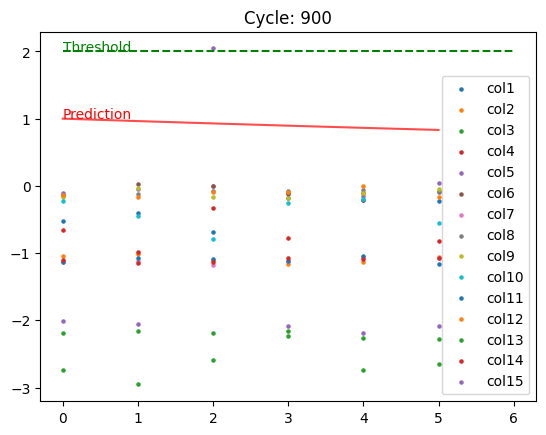

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


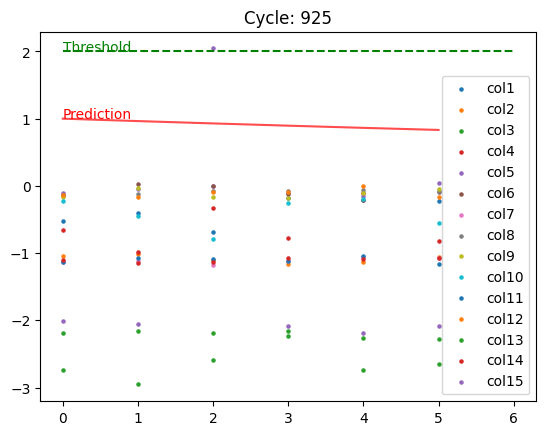

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


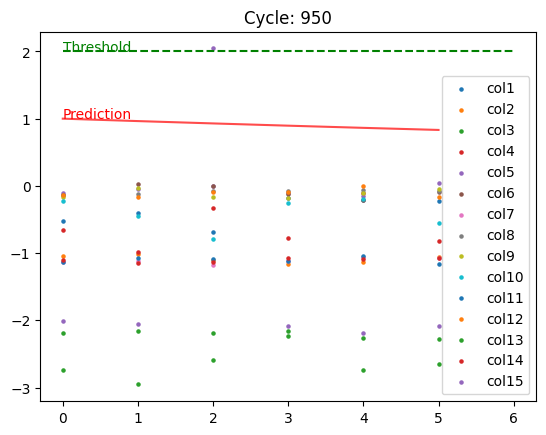

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


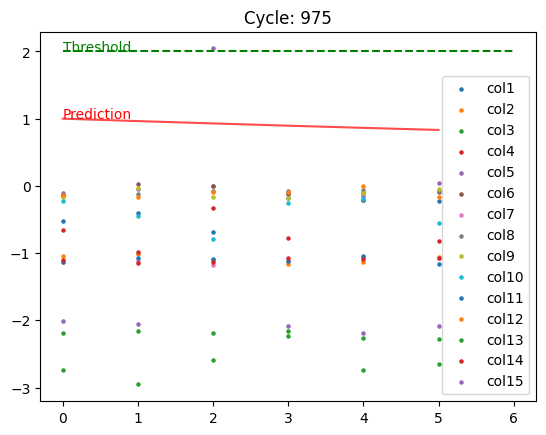

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


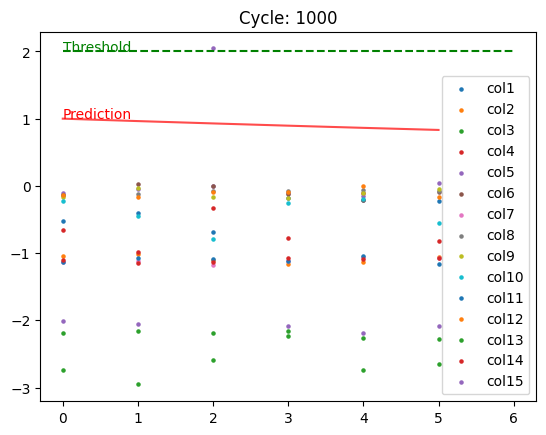

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


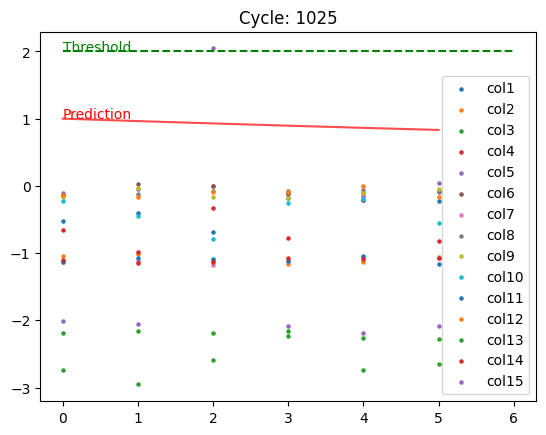

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


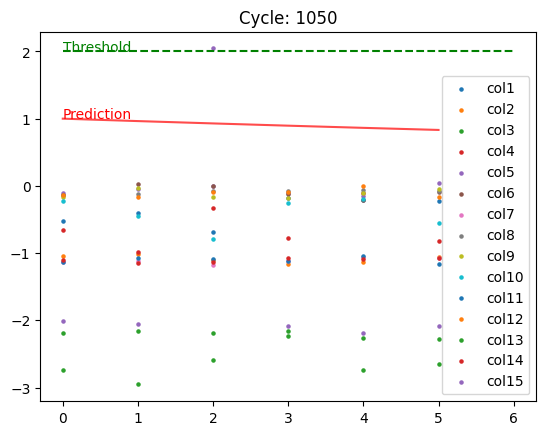

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


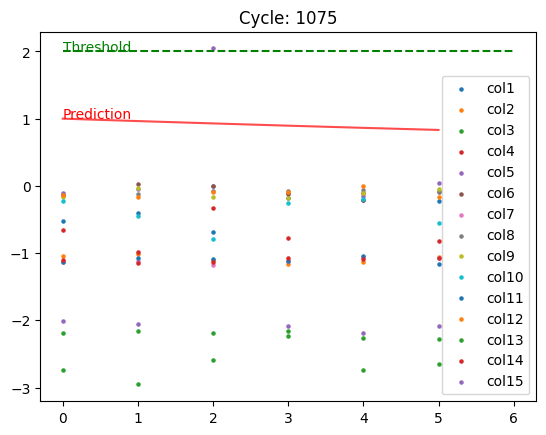

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


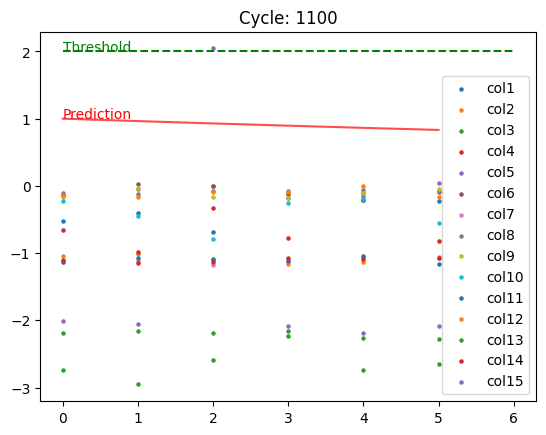

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


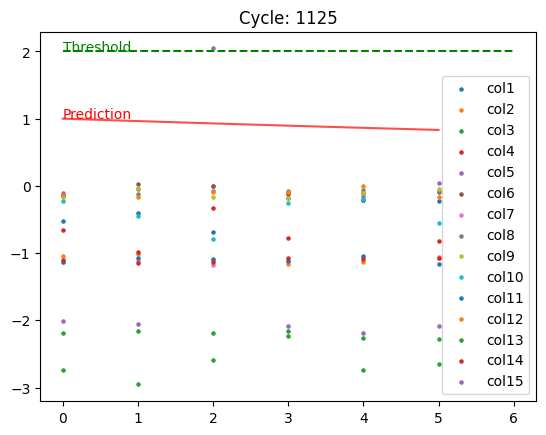

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


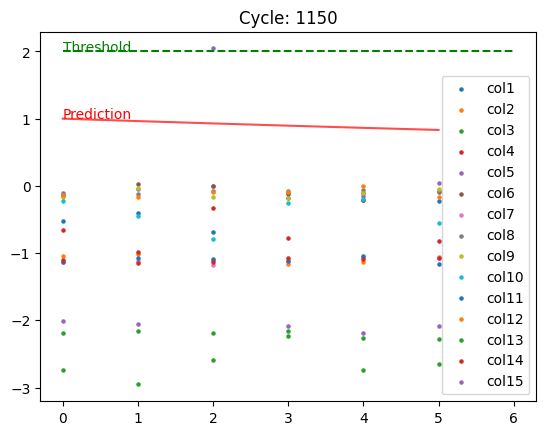

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


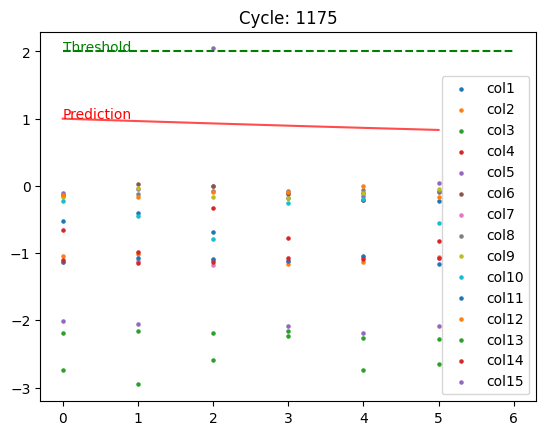

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


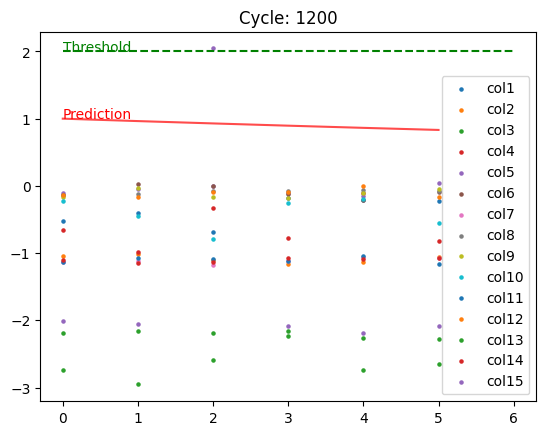

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


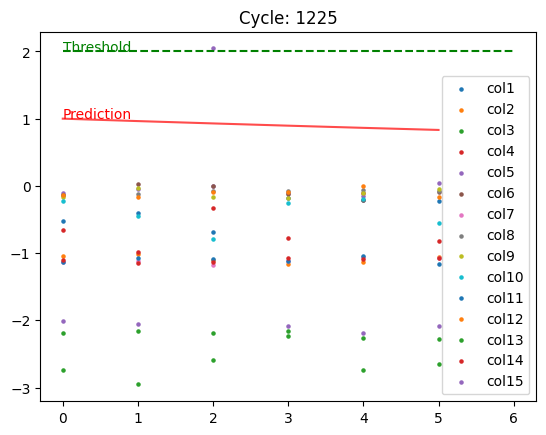

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


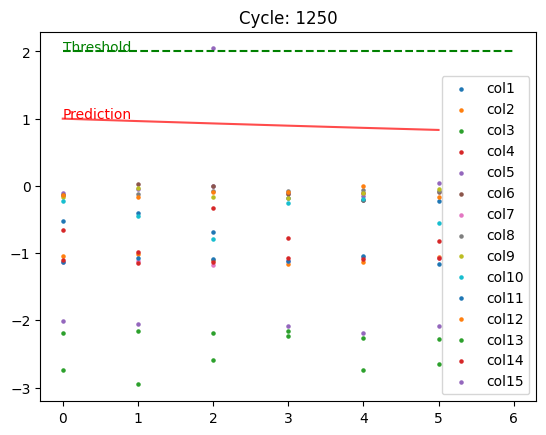

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


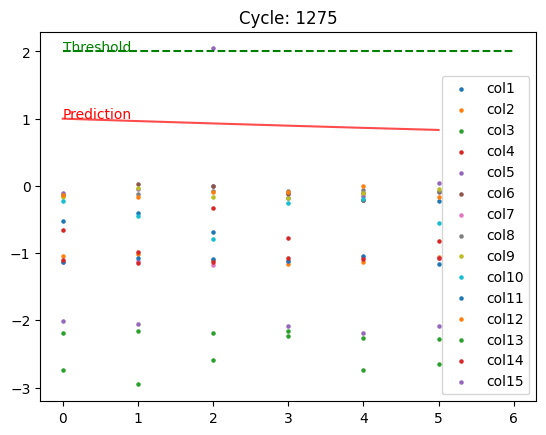

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


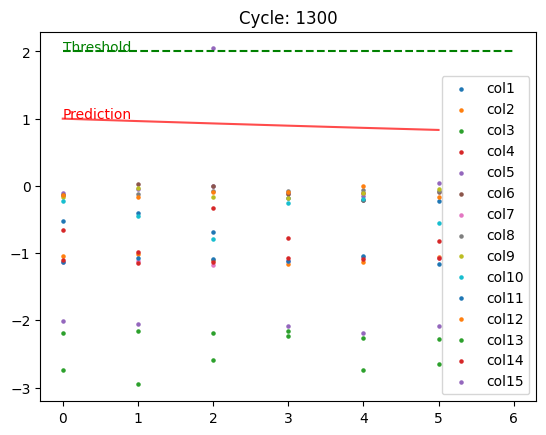

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


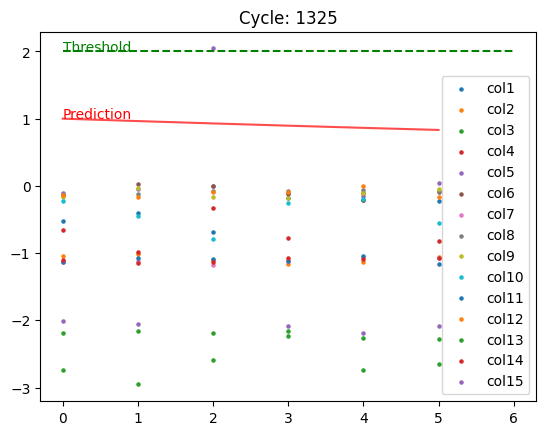

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


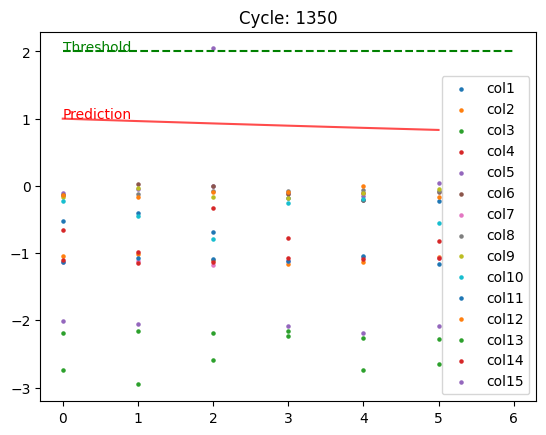

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


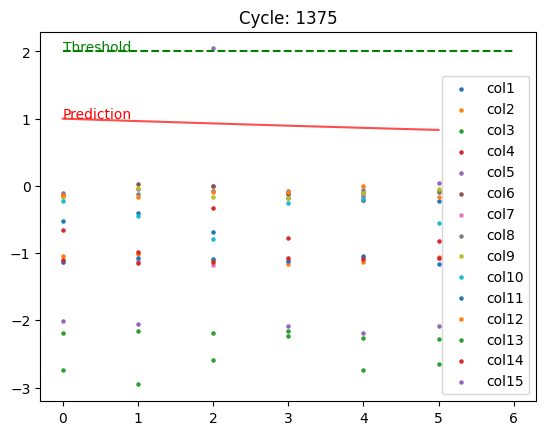

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


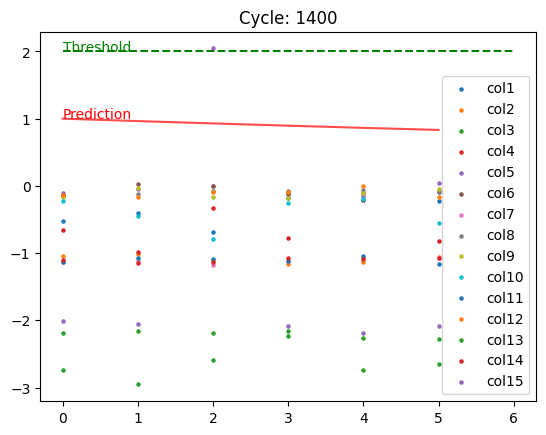

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


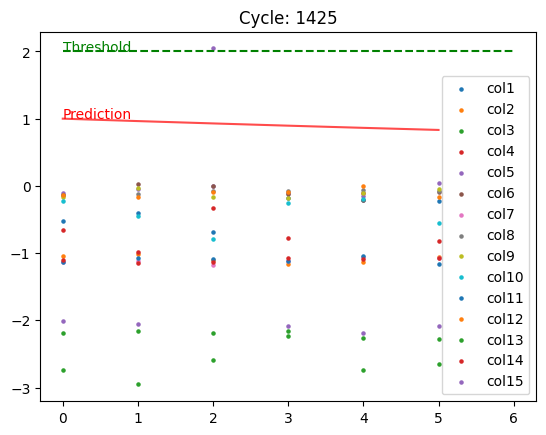

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


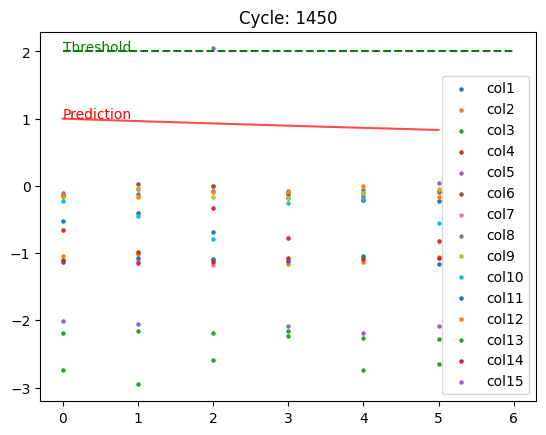

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


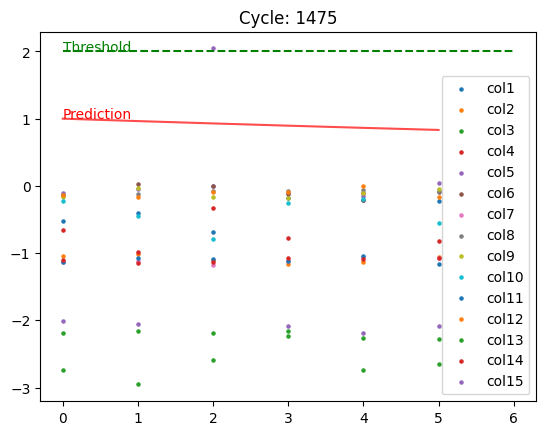

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


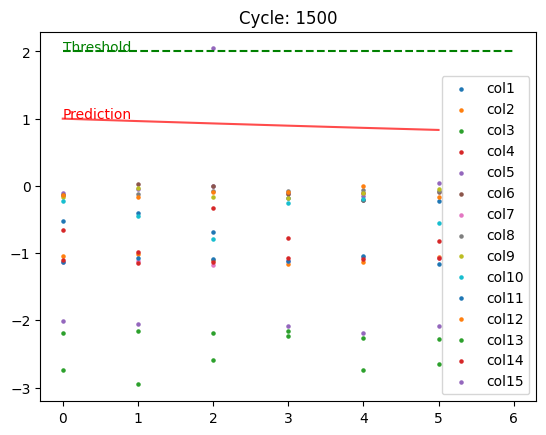

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


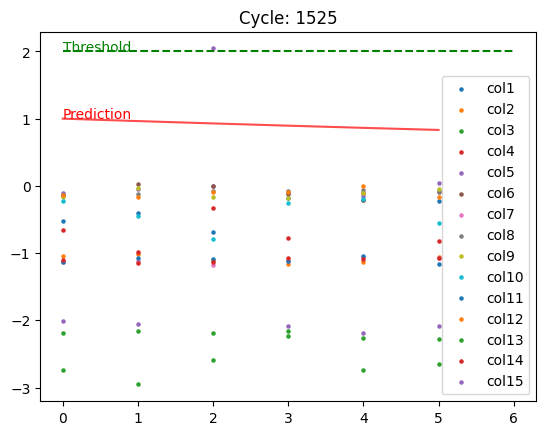

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


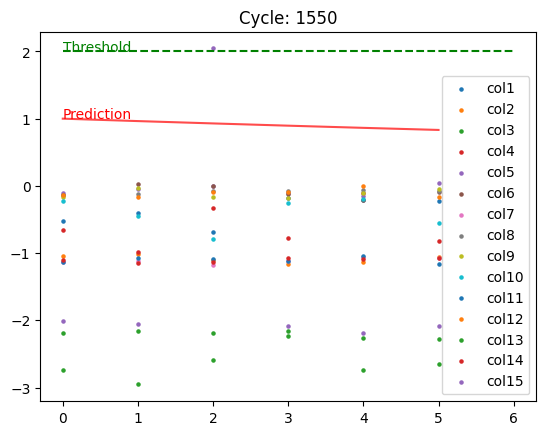

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


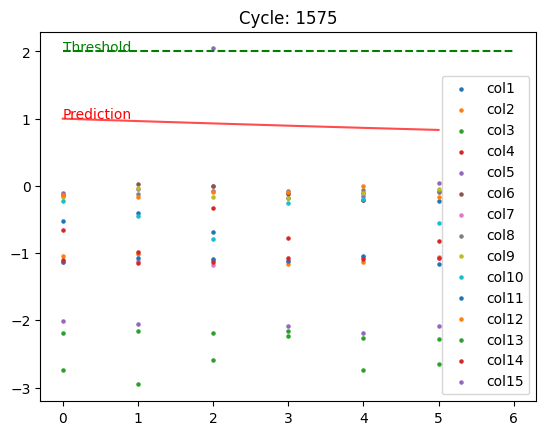

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


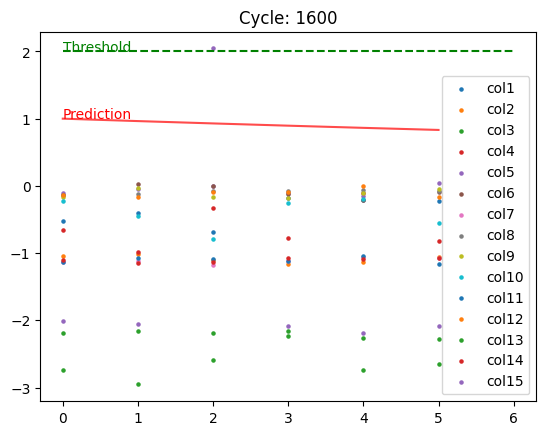

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


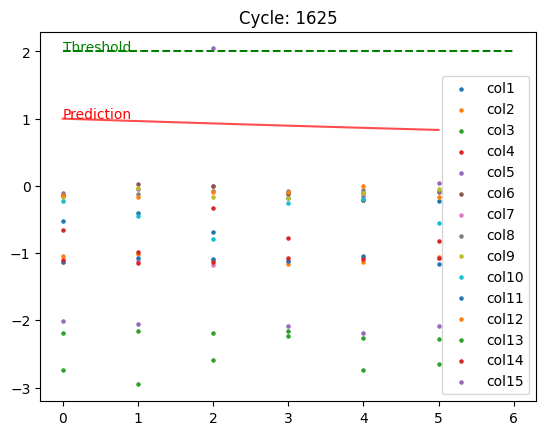

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


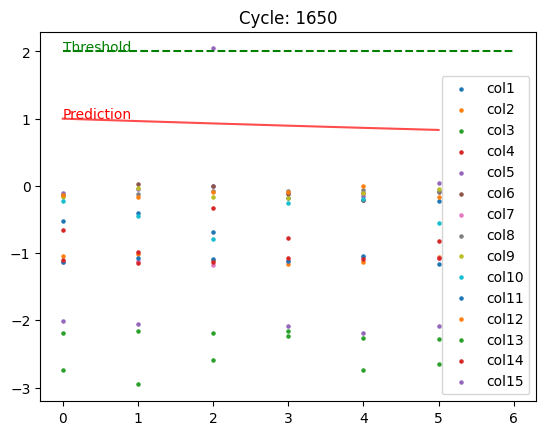

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


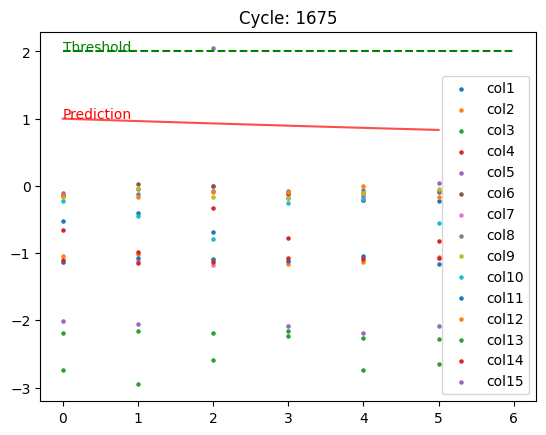

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


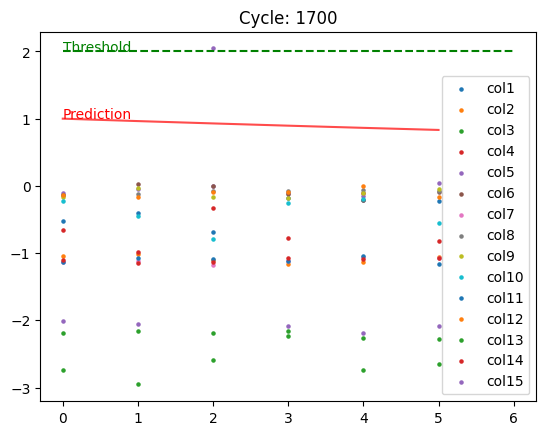

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


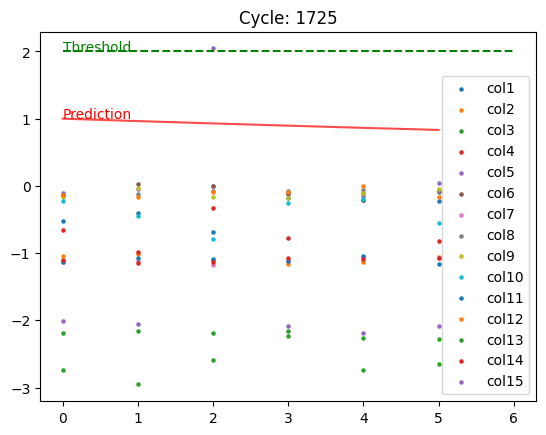

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


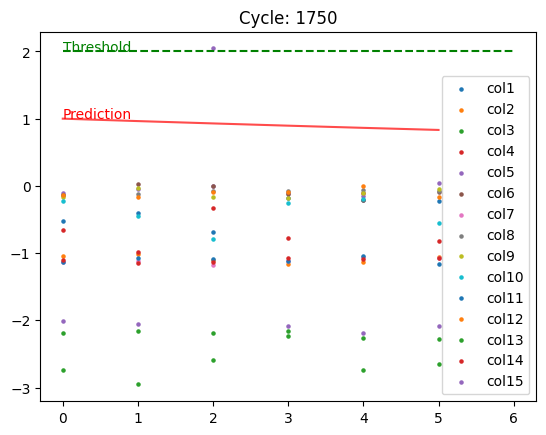

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


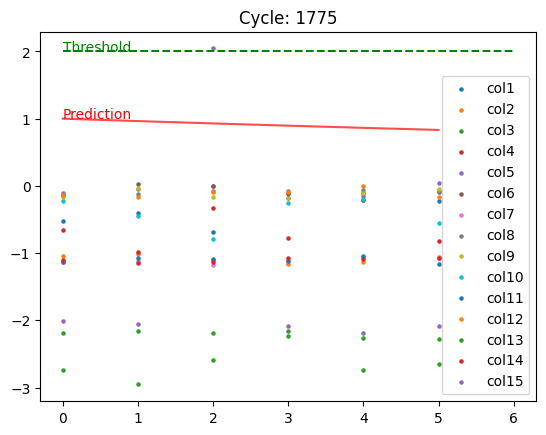

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


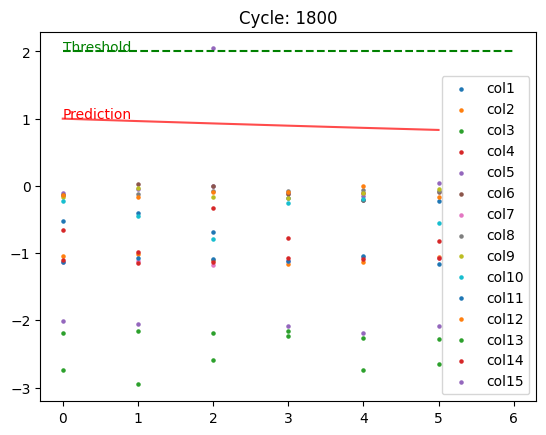

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


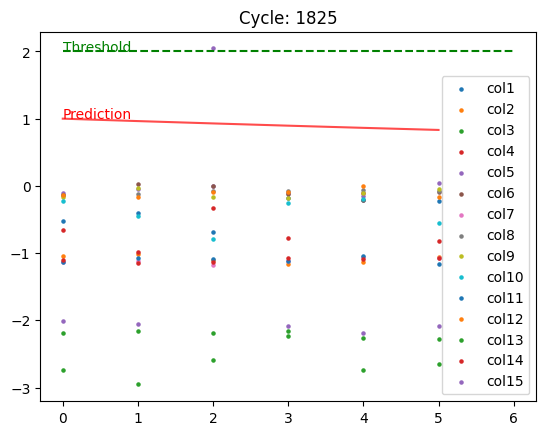

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


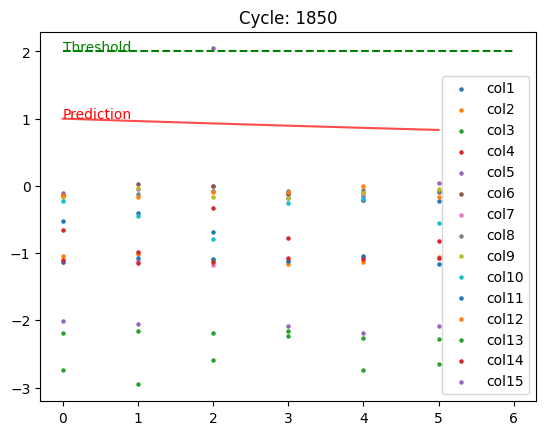

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


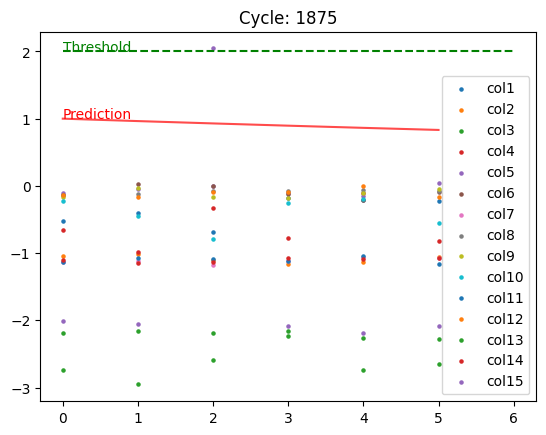

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


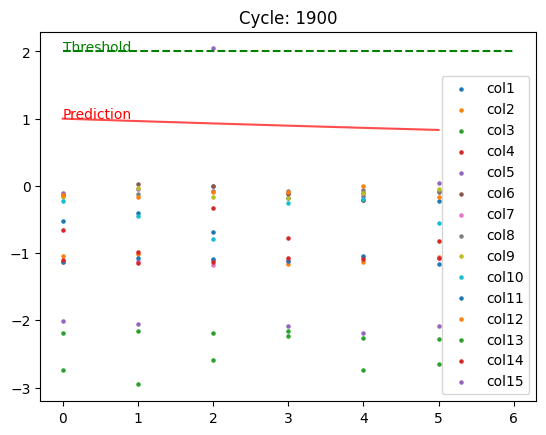

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


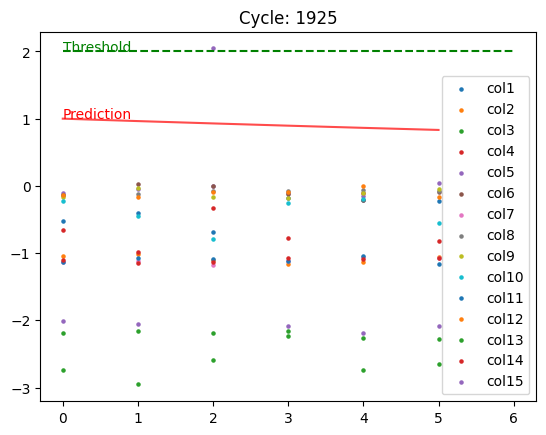

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


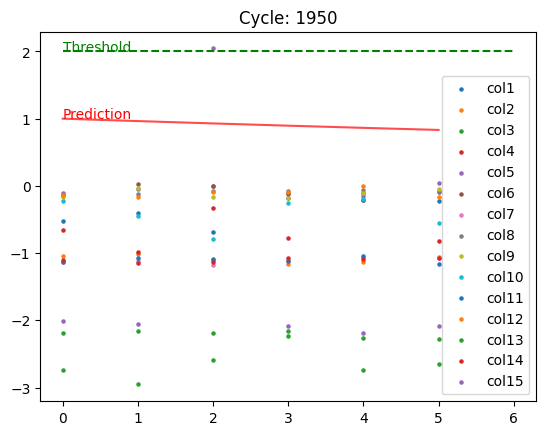

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


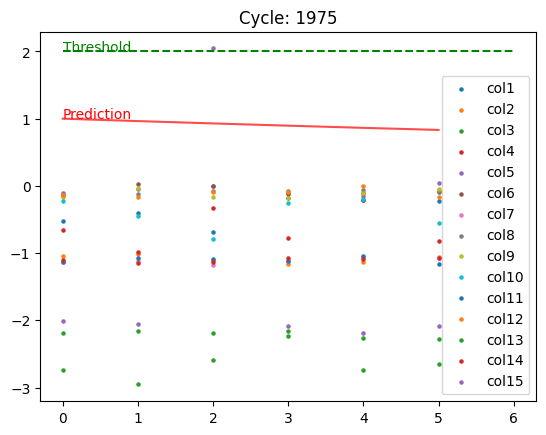

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


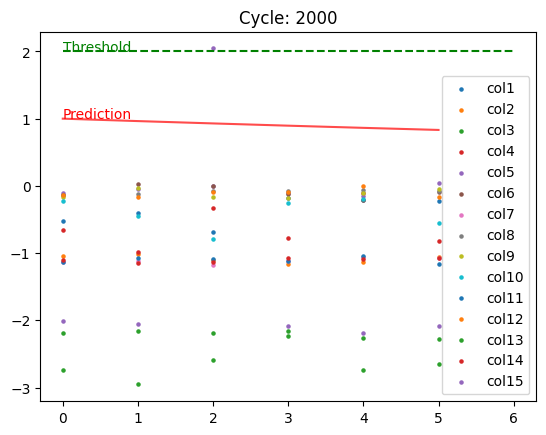

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


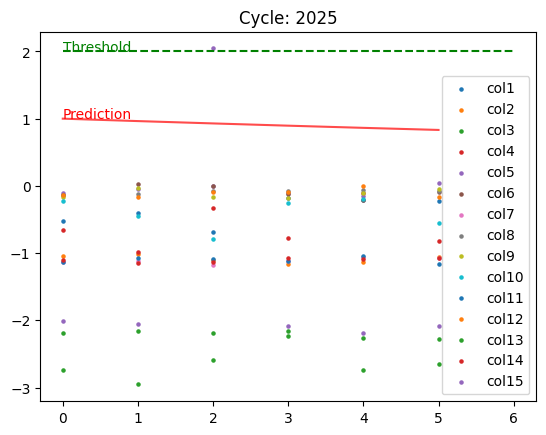

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


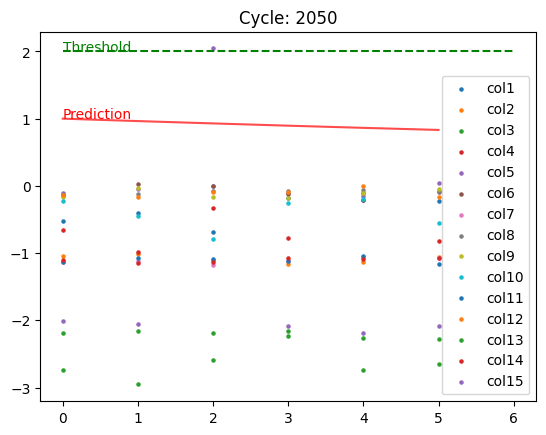

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


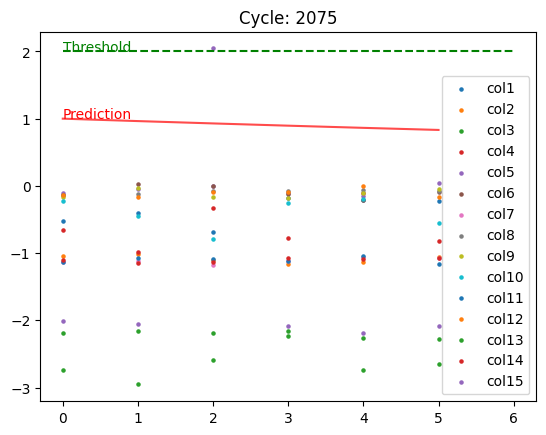

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


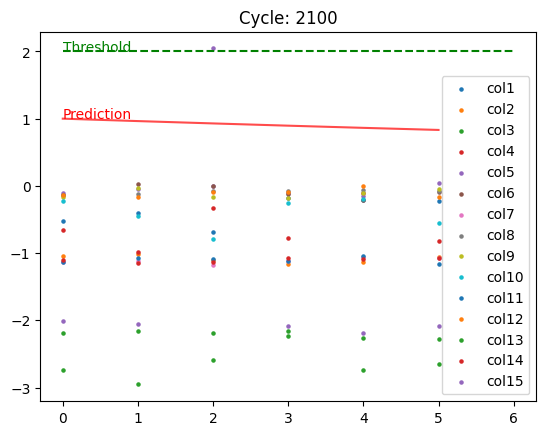

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


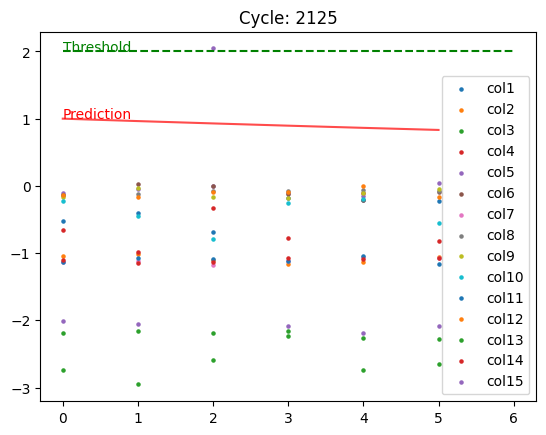

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


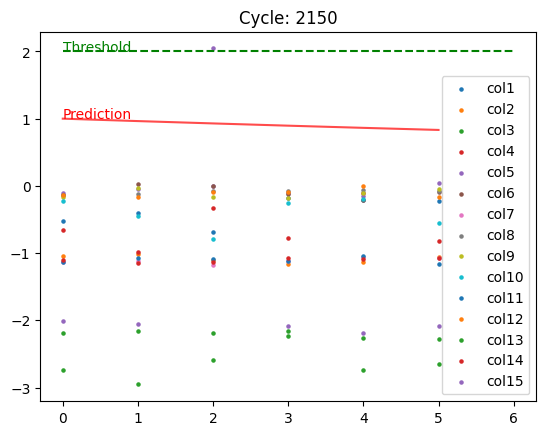

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


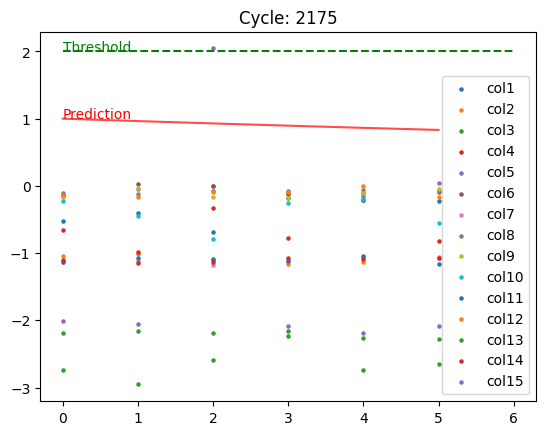

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


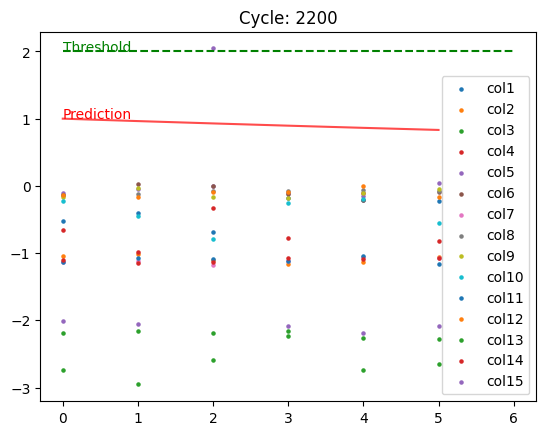

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


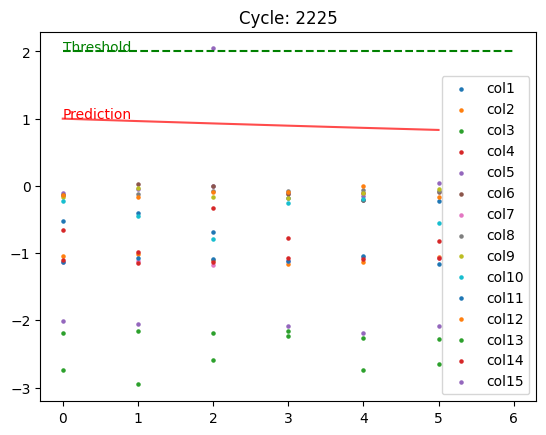

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


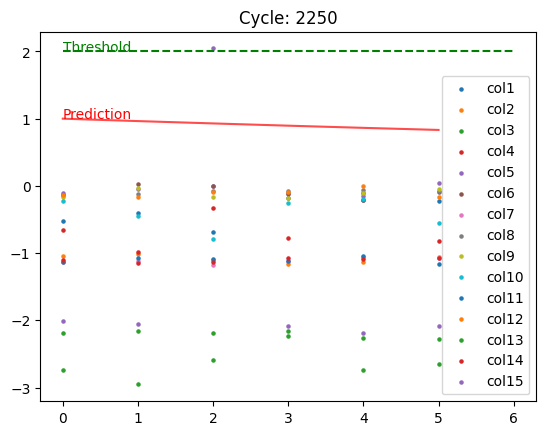

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


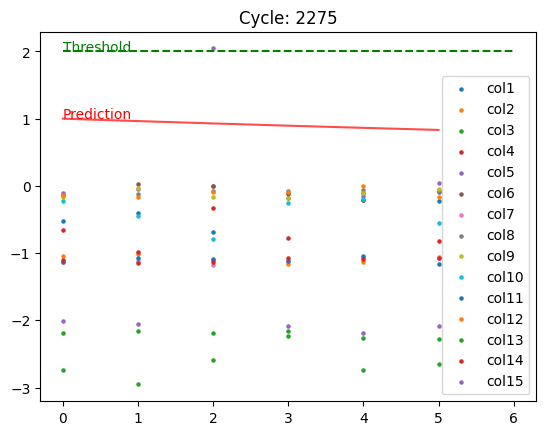

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


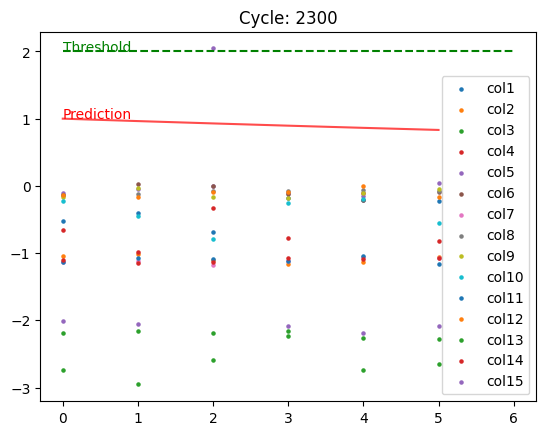

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


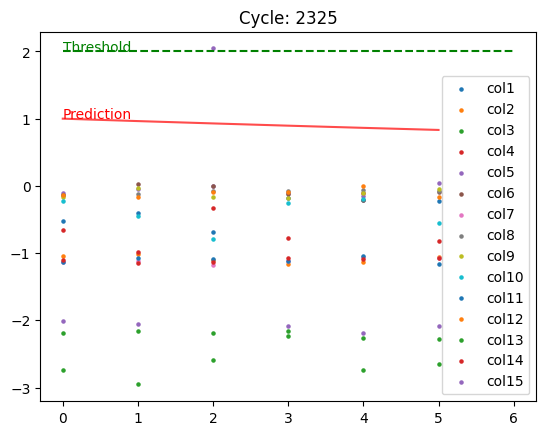

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


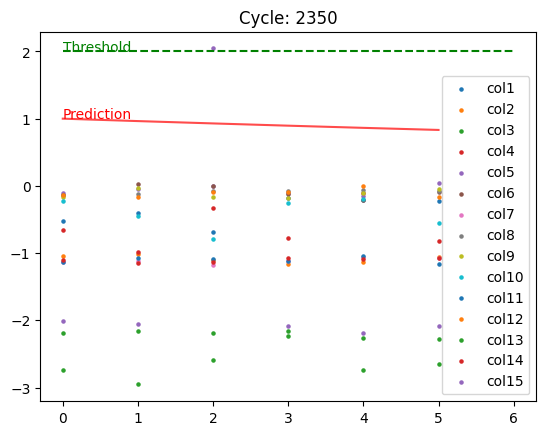

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


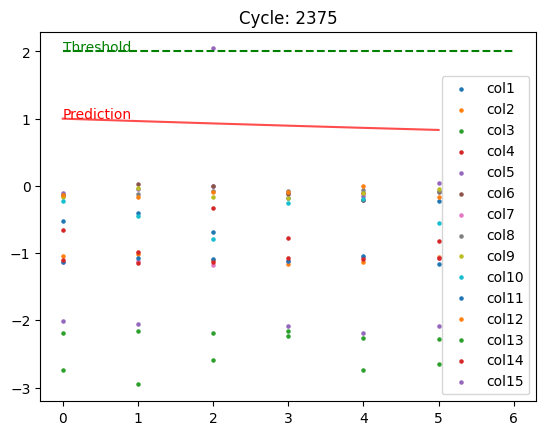

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


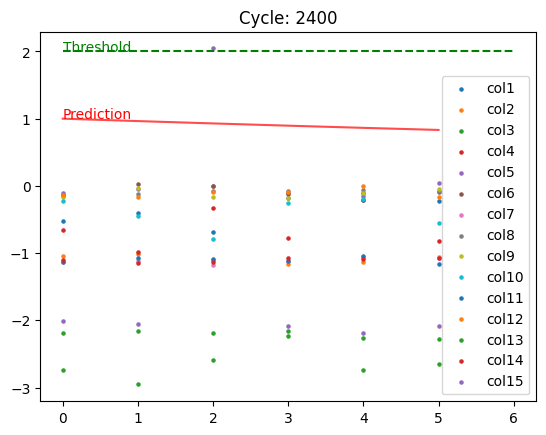

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


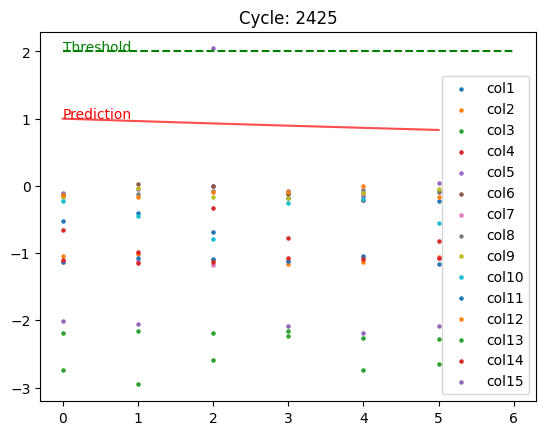

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


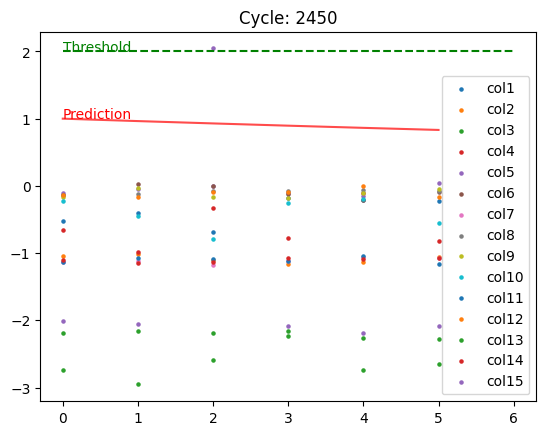

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


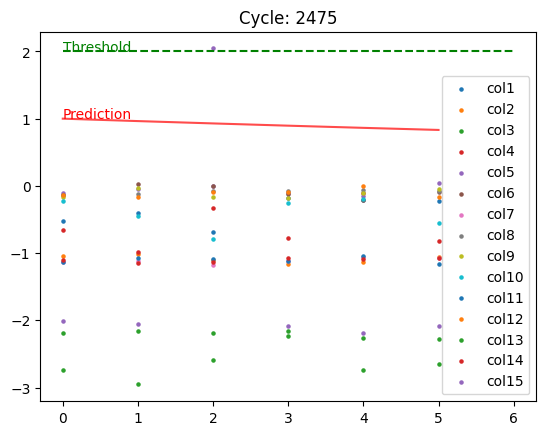

<ipython-input-54-efb86a9c7858>:63: RuntimeWarning: invalid value encountered in log
  fail_cycle = (np.log(thres / m)) / abs(n)


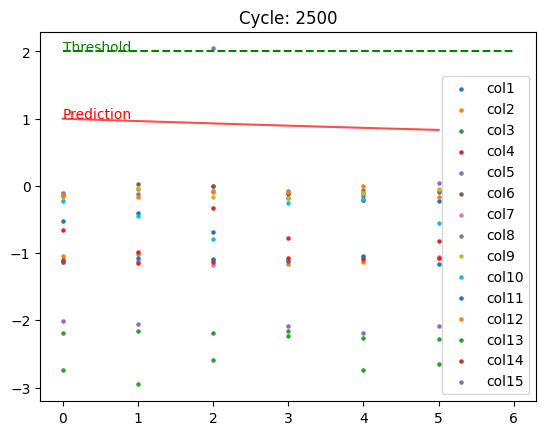

Fit parameters (m, n): -0.03673023809523813 -0.5773416666666665
Failed at cycle: nan


In [ ]:
def health_indicator(data):
    # Calculate the health indicator based on your implementation
    # Here's an example calculation using the mean value of the data
    health_indicator = data.mean()
    return health_indicator

def fit_exp(data, base):
    # Fit an exponential curve to the data and return the parameters
    # Here's an example using numpy's polyfit function to fit a 1st-degree polynomial (exponential)
    x = np.arange(len(data))
    parameters = np.polyfit(x[-base:], data[-base:], deg=1)
    return parameters

def predict(data, fit):

    # Here's an example using the fitted exponential parameters to predict the values
    x = np.arange(len(data))
    prediction = np.exp(fit[0] * x)
    return prediction

# Initialize variables and data
data = {
    'col1': [-0.522, -0.405, -0.683, -0.178, -0.208, -0.232],
    'col2': [-1.039, -1.017, -1.098, -1.161, -1.129, -1.061],
    'col3': [-2.183, -2.164, -2.195, -2.159, -2.261, -2.281],
    'col4': [-0.654, -0.983, -0.325, -0.778, -0.1098, -0.825],
    'col5': [-0.105, -0.049, -0.005, -0.100, -0.151, 0.046],
    'col6': [-0.134, 0.029, -0.007, -0.115, -0.205, -0.088],
    'col7': [-1.129, -1.115, -1.171, -1.112, -1.063, -1.078],
    'col8': [-0.142, -0.122, -0.071, -0.078, -0.066, -0.078],
    'col9': [-0.159, -0.032, -0.161, -0.181, -0.110, -0.044],
    'col10': [-0.225, -0.444, -0.790, -0.259, -0.200, -0.551],
    'col11': [-1.139, -1.076, -1.093, -1.117, -1.039, -1.161],
    'col12': [-0.132, -0.161, -0.090, -0.098, -0.002, -0.161],
    'col13': [-2.742, -2.954, -2.595, -2.232, -2.737, -2.642],
    'col14': [-1.100, -1.151, -1.139, -1.076, -1.093, -1.078],
    'col15': [-2.015, -2.049, 2.044, -2.088, -2.188, -2.081],
}


set1 = pd.DataFrame(data)
prediction_cycle = 100  # Initial prediction cycle value

log = [[], []]  # Initialize the log list

#variable for incrementing index
prediction_cycle = 600
#variable for keeping intial value
init_cycle = prediction_cycle

# Initialize variables
prediction_cycle = 25
log = [[], []]

# Run the simulation repeatedly
for _ in range(100):
    data = set1.iloc[:prediction_cycle]
    degradation = health_indicator(data)
    fit = fit_exp(degradation, base=250)
    prediction = predict(degradation, fit)
    m, n = fit
    thres = 2
    fail_cycle = (np.log(thres / m)) / abs(n)
    log[0].append(prediction_cycle)
    log[1].append(fail_cycle)

    # Plot the results
    fig = plt.figure('Cycle: ' + str(prediction_cycle))
    ax = fig.subplots()
    ax.plot([0, len(data)], [2, 2], color='g', linestyle='--')
    for col in set1.columns:
        ax.scatter(data.index, data[col], label=col, s=5)
    ax.plot(data.index, prediction[:len(data)], color='r', alpha=0.7)  # Use data.index for x-axis
    ax.set_title('Cycle: ' + str(prediction_cycle))

    # Add annotations for threshold and prediction values
    ax.annotate('Threshold', xy=(0, 2), xytext=(0, 2), color='g')
    ax.annotate('Prediction', xy=(0, prediction[0]), xytext=(0, prediction[0]), color='r')

    ax.legend()
    plt.pause(0.3)  # Add a pause to see the plot before moving to the next iteration

    prediction_cycle += 25

# Show all the plots after the loop
plt.show()

# Print the final results
print("Fit parameters (m, n):", m, n)
print("Failed at cycle:", fail_cycle)

